In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from utils import simulate_gbm

In [ ]:
def mean_diff(S0, mu, sigma, T, N, n_paths, leverage):
    return simulate_gbm(S0, mu, sigma, T, int(N), n_paths, leverage).mean()

In [3]:
def std_diff(S0, mu, sigma, T, N, n_paths, leverage):
    return simulate_gbm(S0, mu, sigma, T, int(N), n_paths, leverage).std()

In [ ]:
def plot_heat_lev_sigma_std(
    mu=0,
    sigmas=np.linspace(0.01, 0.4, 100),
    T=5,
    freq=1,
    n_paths=10000,
    factors=np.linspace(1.01, 3, 100),
):
    factor, sigma = np.meshgrid(factors, sigmas)

    diff = np.log(np.vectorize(std_diff)(1, mu, sigma, T, T * freq, n_paths, factor))

    plt.figure(figsize=(4, 3))
    plt.contourf(factor, sigma, diff, cmap="coolwarm")
    plt.title("log of standard deviation of percentage difference lETF - underlying")
    plt.xlabel("leverage factor")
    plt.ylabel("sigma")
    plt.colorbar()

/home/roberto/Projects/Quant finance/Leveraged ETFs/utils.py:21: RuntimeWarning: invalid value encountered in log
  np.cumsum(np.log((np.exp(drift + diffusion) - 1) * leverage + 1), axis=1)


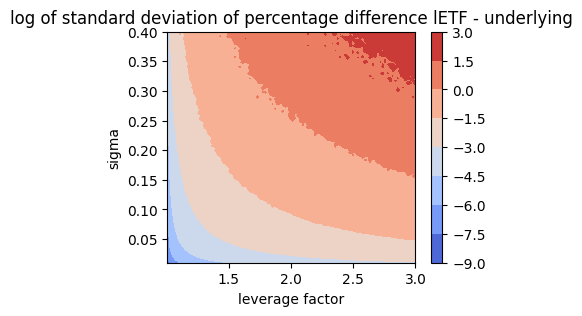

In [5]:
plot_heat_lev_sigma_std()

In [ ]:
def plot_heat_lev_sigma_mean(
    mu=0,
    sigmas=np.linspace(0.01, 0.4, 100),
    T=5,
    freq=1,
    n_paths=1000,
    factors=np.linspace(1.01, 3, 100),
):
    factor, sigma = np.meshgrid(factors, sigmas)

    diff = np.vectorize(mean_diff)(1, mu, sigma, T, T * freq, n_paths, factor)

    plt.figure(figsize=(4, 3))
    plt.contourf(factor, sigma, diff, cmap="coolwarm")
    plt.title("mean of percentage difference lETF - underlying")
    plt.xlabel("leverage factor")
    plt.ylabel("sigma")
    plt.colorbar()

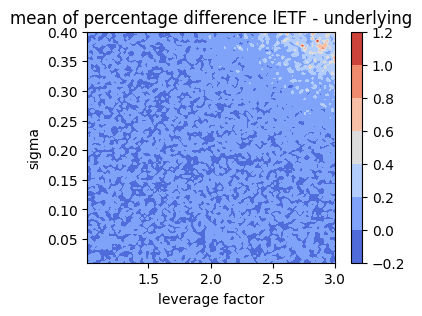

In [7]:
plot_heat_lev_sigma_mean()

In [16]:
import plotly.graph_objects as go

In [ ]:
def plot_surface_lev_sigma_std(
    mu=0,
    sigmas=np.linspace(0.01, 0.4, 100),
    T=5,
    freq=1,
    n_paths=50000,
    factors=np.linspace(1.01, 3, 100),
):
    # ---- Compute surface -----------------------------------------------------
    factor, sigma = np.meshgrid(factors, sigmas)
    diff = np.vectorize(std_diff)(1, mu, sigma, T, T * freq, n_paths, factor)

    # ---- Create interactive surface -----------------------------------------
    fig = go.Figure(
        data=[
            go.Surface(
                x=factor,
                y=sigma,
                z=diff,
                colorscale="RdBu",
                colorbar=dict(title="log std diff"),
            )
        ]
    )

    fig.update_layout(
        title="log std of percentage difference lETF - underlying",
        scene=dict(
            xaxis_title="leverage factor",
            yaxis_title="sigma",
            zaxis_title="log std diff",
        ),
        width=750,
        height=650,
    )

    fig.show()

    # ax.view_init(elev=25, azim=190)

    plt.show()

In [18]:
plot_surface_lev_sigma_std()

/home/roberto/Projects/Quant finance/Leveraged ETFs/utils.py:21: RuntimeWarning: invalid value encountered in log
  np.cumsum(np.log((np.exp(drift + diffusion) - 1) * leverage + 1), axis=1)
